<a href="https://colab.research.google.com/github/Jahlove609/StockRNN/blob/main/stockrnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
# Description: This program uses an artificial recurrent nerual network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (Apple Inc...) using the past 60 day stock price.
#pip install --upgrade pandas
#pip install --upgrade pandas-datareader
#pip install yfinance
#pip install pandas-datareader


In [124]:
#Import the librarie
import math
import pandas as pd
import pandas_datareader as web
import datetime as dt
#import pandas_datareader as web
import numpy as np
#import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import requests
import pandas_datareader as web


In [125]:
s= input('Symbol: ')#'AAPL'

d= input('End Date: ')#2020-10-03


Symbol: AAPL
End Date: 2022-11-24


In [126]:
plt.style.use('fivethirtyeight')

session = requests.session()
session.headers['User-Agent'] = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'

df = web.DataReader( s, data_source='yahoo', start='2012-01-01', end = d, session=session)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519276
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586556
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726295
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859333
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838936
...,...,...,...,...,...,...
2022-11-17,151.479996,146.149994,146.429993,150.720001,80389400.0,150.720001
2022-11-18,152.699997,149.970001,152.309998,151.289993,74794600.0,151.289993
2022-11-21,150.369995,147.720001,150.160004,148.009995,58724100.0,148.009995


In [127]:
#Get the number of rowa and columns in the data set
df.shape

(2743, 6)

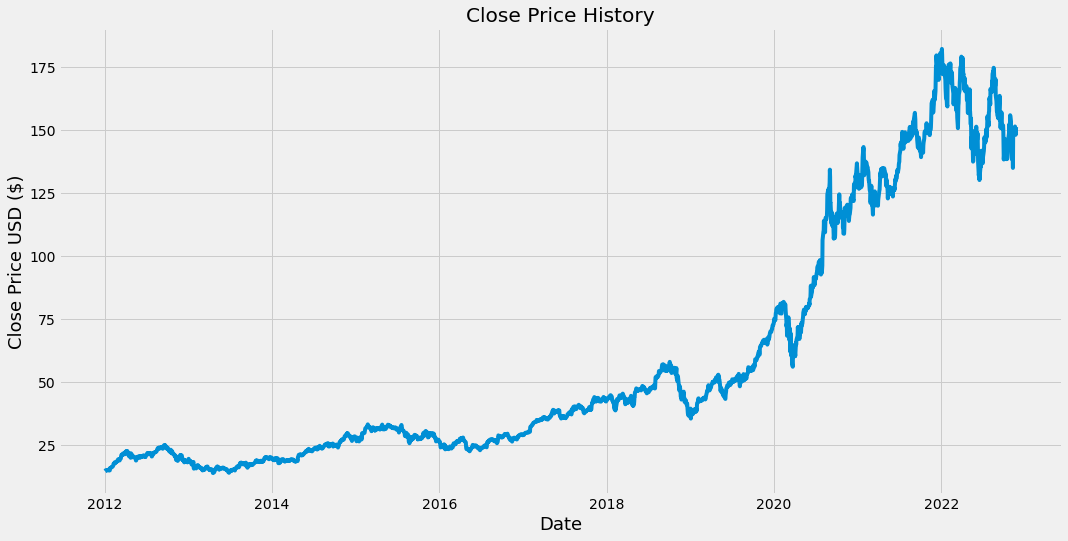

In [128]:
#Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [129]:
#Create a new dataframe with only the column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

2195

In [130]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.7976943 ],
       [0.81060616],
       [0.81590189]])

In [131]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]



In [132]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [133]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(2135, 60, 1)

In [134]:
#Bui;d the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [135]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [136]:
#Train the model
model.fit(x_train, y_train, batch_size=2, epochs=8)

Epoch 1/8
1068/1068 [==============================] - 52s 44ms/step - loss: 9.2006e-04
Epoch 2/8
1068/1068 [==============================] - 46s 43ms/step - loss: 1.8692e-04
Epoch 3/8
1068/1068 [==============================] - 47s 44ms/step - loss: 2.1465e-04
Epoch 4/8
1068/1068 [==============================] - 49s 46ms/step - loss: 1.6136e-04
Epoch 5/8
1068/1068 [==============================] - 46s 43ms/step - loss: 1.1971e-04
Epoch 6/8
1068/1068 [==============================] - 48s 44ms/step - loss: 1.2354e-04
Epoch 7/8
1068/1068 [==============================] - 47s 44ms/step - loss: 1.2530e-04
Epoch 8/8
1068/1068 [==============================] - 46s 43ms/step - loss: 1.1391e-04


In [137]:
#Creat the testing data set
#creat a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len (test_data)):
  x_test.append(test_data[i-60:i,0])

In [138]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [139]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))

In [140]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 2s 16ms/step


In [141]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions- y_test)**2)
rmse

0.0877407101819115

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show(*args, **kw)>

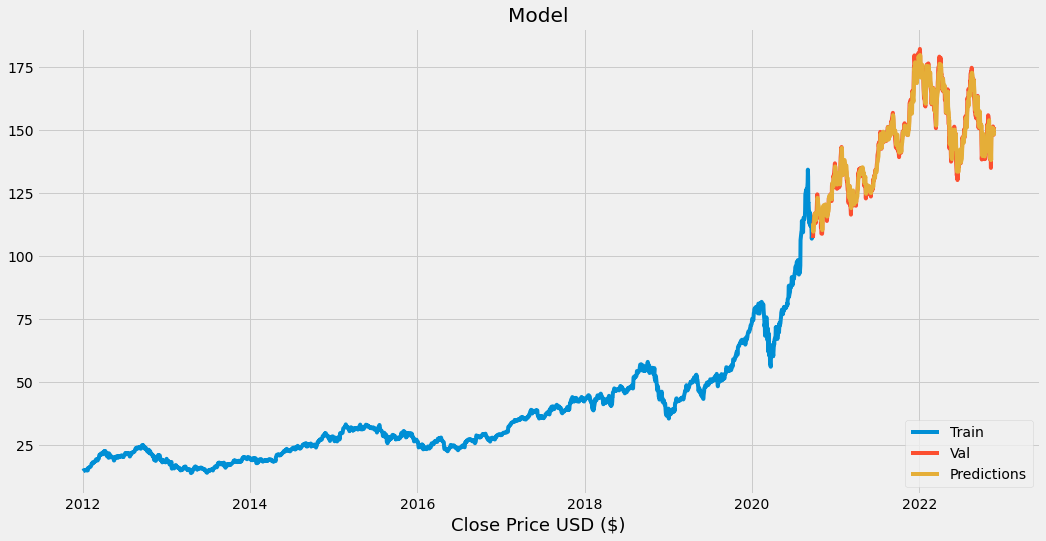

In [142]:
#Plot the data
train= data[: training_data_len]
valid = data[training_data_len:]
valid ['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show

In [143]:
#Show the vaild and predicted prices
valid.tail

<bound method NDFrame.tail of                  Close  Predictions
Date                               
2020-09-23  107.120003   112.910820
2020-09-24  108.220001   110.336861
2020-09-25  112.279999   109.610924
2020-09-28  114.959999   112.390862
2020-09-29  114.089996   115.444031
...                ...          ...
2022-11-17  150.720001   148.330460
2022-11-18  151.289993   149.363174
2022-11-21  148.009995   150.436203
2022-11-22  150.179993   148.198990
2022-11-23  151.070007   149.112183

[548 rows x 2 columns]>